## Adding a new confidence function to ```spred```
--------------------------------------------------------------

In this tutorial, we show how to add a new confidence function for selective prediction. 

**Before doing this tutorial, it is recommended that you first go through the tutorial "Adding a new task to ```spred```".**

Let's begin by setting up a task and training a prediction function for it. In this tutorial, we'll use the classic MNIST handwritten digit recognition task, but we randomly swap the labels of ones and sevens to make those labels synthetically "harder".

In [1]:
task_config = {"name": "mnist",
               "confuser": "1<>7"}

For our prediction function, we'll use a simple feedforward neural network with two hidden layers, trained with a standard cross-entropy loss. MNIST images are always 28x28 pixels, thus the input vectors have size 784. As there are 10 digits, the output size of the network is 10.

In [2]:
model_config = {"architecture": "feedforward",
                "input_size": 784,
                "hidden_sizes": [128, 64],
                "output_size": 10,
                "loss": {
                    "name": "ce"
                }}

Before creating a new confidence function, let's try two baselines on the "confused" MNIST task:
1. **"random"**: just associate a random confidence with each prediction
2. **"max_prob"**: use the softmax probability of the prediction as its confidence

In [3]:
confs = [{"name": "random"},
         {"name": "max_prob"}]

Now that we've specified our task, our model, and our confidences, let's bundle them together into an experiment configuration. We'll also specify a couple extra details, like the optimizer (stochastic gradient descent with momentum of 0.9 and a learning rate of 0.003), the batch size (64), and the number of training epochs (30).

In [4]:
config = {"task": task_config,
          "network": model_config,
          "confidences": confs,
          "optimizer": {"name": "sgd",
                        "lr": 0.003,
                        "momentum": 0.9},
          "bsz": 64,
          "n_epochs": 15}

Let's run 5 trials of the experiment and visualize the results.

In [5]:
from spred.experiment import Experiment
from spred.analytics import ResultDatabase
exp = Experiment(config)
n_trials = 5
result_db = ResultDatabase([exp.run() for _ in range(n_trials)])

Using downloaded and verified file: /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/train/MNIST/raw/train-images-idx3-ubyte.gz
Extracting /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/train/MNIST/raw/train-images-idx3-ubyte.gz to /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/train/MNIST/raw

Using downloaded and verified file: /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/train/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/train/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/train/MNIST/raw

Using downloaded and verified file: /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/train/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /Users/markhopkins/Documents/projects/selecti

/Users/markhopkins/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Using downloaded and verified file: /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/test/MNIST/raw/train-images-idx3-ubyte.gz
Extracting /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/test/MNIST/raw/train-images-idx3-ubyte.gz to /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/test/MNIST/raw

Using downloaded and verified file: /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/test/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/test/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/test/MNIST/raw

Using downloaded and verified file: /Users/markhopkins/Documents/projects/selective/selective-prediction/data/mnist/test/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /Users/markhopkins/Documents/projects/selective/sele

100%|██████████| 469/469 [00:00<00:00, 865.69it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1051.73it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1051.06it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1057.71it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1050.66it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1024.50it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1061.92it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1061.82it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1065.13it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1065.19it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1059.46it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1064.80it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1066.03it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1064.50it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1062.80it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 196.32it/s]


{'name': 'random'}
{
    "accuracy": 0.8352,
    "aupr": 0.8381612444762954,
    "auroc": 0.5031556740086671,
    "avg_crr_conf": 0.41573083354234697,
    "avg_err_conf": 0.08151017758250237,
    "capacity": 0.8381296535712889,
    "kendall_tau": 0.4968443259913328,
    "n_correct": 8352,
    "n_errors": 1648,
    "n_published": 10000,
    "validation_loss": 0.35750798150232643
}


100%|██████████| 157/157 [00:00<00:00, 195.27it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8316,
    "aupr": 0.9794844388005637,
    "auroc": 0.8987585746047742,
    "avg_crr_conf": 0.7341443186149001,
    "avg_err_conf": 0.08920475687682629,
    "capacity": 0.9671696229792252,
    "kendall_tau": 0.10124153250637812,
    "n_correct": 8316,
    "n_errors": 1684,
    "n_published": 10000,
    "validation_loss": 0.357208736762879
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'random'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 1069.37it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1066.14it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1055.13it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1021.20it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1054.27it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1060.39it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1059.31it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1057.35it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1058.25it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1061.06it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1060.26it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1068.44it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1063.97it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1060.23it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1059.57it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 197.49it/s]


{'name': 'random'}
{
    "accuracy": 0.8377,
    "aupr": 0.8401335176807225,
    "auroc": 0.5062477424212101,
    "avg_crr_conf": 0.41996430914402005,
    "avg_err_conf": 0.08034847280979157,
    "capacity": 0.8400791671130142,
    "kendall_tau": 0.49375225757878993,
    "n_correct": 8377,
    "n_errors": 1623,
    "n_published": 10000,
    "validation_loss": 0.3534612356667306
}


100%|██████████| 157/157 [00:00<00:00, 196.73it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.832,
    "aupr": 0.9798588518642365,
    "auroc": 0.8999912359775641,
    "avg_crr_conf": 0.742292472691834,
    "avg_err_conf": 0.09168231888860465,
    "capacity": 0.9674381188796856,
    "kendall_tau": 0.10000887133699633,
    "n_correct": 8320,
    "n_errors": 1680,
    "n_published": 10000,
    "validation_loss": 0.35338871038643416
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'random'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 1067.73it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1061.59it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1063.44it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1039.73it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1062.05it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1065.03it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1061.37it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1064.87it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1061.81it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1061.96it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1062.21it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1068.70it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1063.38it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1064.30it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1062.80it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 198.14it/s]


{'name': 'random'}
{
    "accuracy": 0.8333,
    "aupr": 0.8342972824752581,
    "auroc": 0.49786104221613375,
    "avg_crr_conf": 0.4141428767323494,
    "avg_err_conf": 0.08319367132782936,
    "capacity": 0.8342634007592087,
    "kendall_tau": 0.5021389577838662,
    "n_correct": 8333,
    "n_errors": 1667,
    "n_published": 10000,
    "validation_loss": 0.35434568630661933
}


100%|██████████| 157/157 [00:00<00:00, 196.24it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8353,
    "aupr": 0.9799755016234377,
    "auroc": 0.8985390107760984,
    "avg_crr_conf": 0.7398173006147146,
    "avg_err_conf": 0.08820384417027236,
    "capacity": 0.9680115840612471,
    "kendall_tau": 0.1014610982562028,
    "n_correct": 8353,
    "n_errors": 1647,
    "n_published": 10000,
    "validation_loss": 0.3544787786378982
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'random'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 1060.81it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1068.05it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1062.96it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1063.07it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1055.89it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1030.73it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1058.13it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1059.95it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1056.75it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1054.41it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1043.08it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1058.82it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1058.02it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1062.61it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1059.91it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 197.15it/s]


{'name': 'random'}
{
    "accuracy": 0.8358,
    "aupr": 0.840887380207433,
    "auroc": 0.5087063121418822,
    "avg_crr_conf": 0.41456876380443575,
    "avg_err_conf": 0.08001764535307884,
    "capacity": 0.8408269868624901,
    "kendall_tau": 0.4912936878581178,
    "n_correct": 8358,
    "n_errors": 1642,
    "n_published": 10000,
    "validation_loss": 0.3573472622283705
}


100%|██████████| 157/157 [00:00<00:00, 196.76it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8352,
    "aupr": 0.9803641545555132,
    "auroc": 0.9015773357000707,
    "avg_crr_conf": 0.7357031313285232,
    "avg_err_conf": 0.08678809647411108,
    "capacity": 0.9684153358798078,
    "kendall_tau": 0.09842280960551278,
    "n_correct": 8352,
    "n_errors": 1648,
    "n_published": 10000,
    "validation_loss": 0.35787387799685166
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'random'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 1069.64it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1061.49it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1058.19it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1054.99it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1057.96it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1058.21it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1060.47it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1058.01it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1059.94it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1058.83it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1060.89it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1053.10it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1058.58it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1070.28it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1065.26it/s]


Best validation accuracy at epoch 14


100%|██████████| 157/157 [00:00<00:00, 197.64it/s]


{'name': 'random'}
{
    "accuracy": 0.8317,
    "aupr": 0.8232267899672205,
    "auroc": 0.48351653376089504,
    "avg_crr_conf": 0.4106423616528511,
    "avg_err_conf": 0.08587818089723587,
    "capacity": 0.8231198290954879,
    "kendall_tau": 0.5164834662391049,
    "n_correct": 8317,
    "n_errors": 1683,
    "n_published": 10000,
    "validation_loss": 0.3684802339145332
}


100%|██████████| 157/157 [00:00<00:00, 196.59it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.834,
    "aupr": 0.9787125597836223,
    "auroc": 0.8942547889399324,
    "avg_crr_conf": 0.7338251188337803,
    "avg_err_conf": 0.0902533088952303,
    "capacity": 0.9667792798441659,
    "kendall_tau": 0.10574528329143913,
    "n_correct": 8340,
    "n_errors": 1660,
    "n_published": 10000,
    "validation_loss": 0.36804948604790266
}


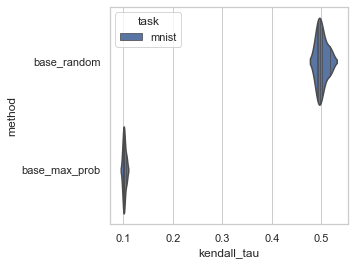

In [6]:
from spred.analytics import plot_evaluation_metric
plot_evaluation_metric(result_db, "kendall_tau")

As usual, **max_prob** is a strong baseline, consistently giving us a worst-case normalized kendall-tau distance around 0.1. Let's see if we can create a better one! To do so, we need to implement the interface for ```Confidence```, as defined in ```spred.confidence```:

    class Confidence:
    
        @abstractmethod
        def __call__(self, batch, model):
            """
            For each prediction in the batch, computes an associated confidence.
    
            ```batch``` is a dictionary with the following keys:
            - ```inputs```: a torch.tensor of shape BxD, where B is the batch size
              and D is the dimension of the input vectors. Each row corresponds to
              an input instance.
            - ```outputs```: a torch.tensor of shape BxL, where B is the batch size
              and L is the number of labels. Each row corresponds to the predicted
              values for each label. These are not assumed to be normalized.
    
            This function is expected to return a torch.tensor of shape B,
            containing the confidences of each prediction in the batch.
    
            """
            ...
            
We only need to implement the ```__call__``` method, which takes a batch of predictions and returns a tensor containing our computed confidences. Note that the method also takes the trained prediction model as a second argument, in case we'd like to use it for computing the confidences. In this tutorial, we won't, but if you're interested in methods that do, take a look at the implementation of ```MCDropoutConfidence```.

Before creating a new confidence function, let's look at how **MaxProb** works in a bit more detail. **MaxProb** doesn't care about the input representations, so we won't bother specifying those. For the output values, let's assume we have a 3-label classification task and two predictions:
- the first prediction assigns weight -1.0 to class 0, weight -2.5 to class 1, and weight 0.5 to class 2
- the second prediction assigns weight -2.0 to class 0, weight 1.5 to class 1, and weight -3.0 to class 2


In [16]:
from torch import tensor
batch = {'inputs': None, 
         'outputs': tensor([[-1.0, -2.5,   0.5],
                            [-2.0,  1.5,  -3.0]])}


If we apply the softmax function to the prediction weights, we get two prediction distributions.

In [17]:
from spred.util import softmax
softmax(batch['outputs'])

tensor([[0.1710, 0.0629, 0.7662],
        [0.0271, 0.8991, 0.0738]])

As its prediction confidence, **MaxProb** uses the probability allocated to the predicted (i.e. the most probable) label. Thus, it assigns a confidence of 0.7662 to the first prediction and a confidence of 0.8991 to the second.

In [18]:
from spred.confidence import MaxProb
max_prob = MaxProb()
confs = max_prob(batch)
print("Predicted confidences for this batch: {}".format(confs))

Predicted confidences for this batch: tensor([0.7662, 0.8991])


As an alternative, let's implement a confidence function known as **Probability Difference**, which uses the difference between the highest probability and the **second highest** probability. For the above batch, it should therefore assign a confidence of **0.5952** (i.e. 0.7662-0.1710) to the first prediction, and a confidence of **0.8253** (i.e. 0.8991-0.0738) to the second. Let's first create functions that can extract the highest and second highest probabilities from each row of a tensor.

In [27]:
import torch

def highest(t):
    return t.max(dim=1).values

def second_highest(t):
    indices = t.max(dim=1).indices.unsqueeze(dim=1)
    negate_highest = t.scatter_add(1, indices, -torch.ones(len(t), 1))
    return negate_highest.max(dim=1).values

t = softmax(batch['outputs'])
print('For tensor:')
print(t)
print('The highest probs are:   {}'.format(highest(t)))
print('2nd highest probs are:   {}'.format(second_highest(t)))

For tensor:
tensor([[0.1710, 0.0629, 0.7662],
        [0.0271, 0.8991, 0.0738]])
The highest probs are:   tensor([0.7662, 0.8991])
2nd highest probs are:   tensor([0.1710, 0.0738])


Having defined these two functions, creating our new confidence function is just a matter of subtracting tensors.

In [29]:
from spred.confidence import Confidence

class ProbabilityDifference(Confidence):
    def __call__(self, batch, model=None):
        probs = softmax(batch['outputs'])
        return highest(probs) - second_highest(probs)

Let's register our new confidence function with Spred Hub and see how it compares to **MaxProb** on MNIST!

In [31]:
from spred.hub import spred_hub
spred_hub.register_confidence_fn("pd", ProbabilityDifference)
confs = [{"name": "pd"},
         {"name": "max_prob"}]
config = {"task": task_config,
          "network": model_config,
          "confidences": confs,
          "optimizer": {"name": "sgd",
                        "lr": 0.003,
                        "momentum": 0.9},
          "bsz": 64,
          "n_epochs": 15}
exp = Experiment(config)
n_trials = 5
result_db2 = ResultDatabase([exp.run() for _ in range(n_trials)])

Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'pd'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 914.60it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1034.72it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1027.90it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1031.56it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1030.58it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1030.49it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1026.58it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1028.83it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1027.38it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1031.91it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1034.45it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1034.41it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1035.52it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1034.99it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1039.20it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 193.28it/s]


{'name': 'pd'}
{
    "accuracy": 0.8303,
    "aupr": 0.980165885691952,
    "auroc": 0.9025926618028102,
    "avg_crr_conf": 0.661533453553915,
    "avg_err_conf": 0.028568234086036683,
    "capacity": 0.9674388923135048,
    "kendall_tau": 0.0974073381971898,
    "n_correct": 8303,
    "n_errors": 1697,
    "n_published": 10000,
    "validation_loss": 0.3598536282872698
}


100%|██████████| 157/157 [00:00<00:00, 197.48it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8302,
    "aupr": 0.9798692484859304,
    "auroc": 0.9012674227533689,
    "avg_crr_conf": 0.7349814069122076,
    "avg_err_conf": 0.09188655031919479,
    "capacity": 0.9675977330639851,
    "kendall_tau": 0.09873257724663108,
    "n_correct": 8302,
    "n_errors": 1698,
    "n_published": 10000,
    "validation_loss": 0.3630595789024025
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'pd'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 906.86it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1031.85it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1031.64it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1023.20it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1034.14it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1035.19it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1032.20it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1034.39it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1035.42it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1032.08it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1037.04it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1034.46it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1036.19it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1038.10it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1040.53it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 196.21it/s]


{'name': 'pd'}
{
    "accuracy": 0.8376,
    "aupr": 0.9795964327052159,
    "auroc": 0.8950152191224281,
    "avg_crr_conf": 0.6618597231626511,
    "avg_err_conf": 0.025990310413390397,
    "capacity": 0.9680494163132026,
    "kendall_tau": 0.10498481763518568,
    "n_correct": 8376,
    "n_errors": 1624,
    "n_published": 10000,
    "validation_loss": 0.3586862732650368
}


100%|██████████| 157/157 [00:00<00:00, 198.87it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8313,
    "aupr": 0.9795033468329655,
    "auroc": 0.8983714097608597,
    "avg_crr_conf": 0.7354556970134377,
    "avg_err_conf": 0.09040357412248849,
    "capacity": 0.9669357747851685,
    "kendall_tau": 0.10162862589222742,
    "n_correct": 8313,
    "n_errors": 1687,
    "n_published": 10000,
    "validation_loss": 0.35877333685850643
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'pd'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 1040.28it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1040.01it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1036.93it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1033.79it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1037.09it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1039.32it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 895.98it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1037.48it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1036.13it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1039.24it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1037.66it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1020.05it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1036.10it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1042.71it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1038.40it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 194.59it/s]


{'name': 'pd'}
{
    "accuracy": 0.8356,
    "aupr": 0.9790955106505024,
    "auroc": 0.8933366207419469,
    "avg_crr_conf": 0.6653363290041685,
    "avg_err_conf": 0.026556782306730746,
    "capacity": 0.96726410771782,
    "kendall_tau": 0.10666337925805314,
    "n_correct": 8356,
    "n_errors": 1644,
    "n_published": 10000,
    "validation_loss": 0.3586533786195099
}


100%|██████████| 157/157 [00:00<00:00, 198.83it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8371,
    "aupr": 0.9799746388913889,
    "auroc": 0.8977775519110344,
    "avg_crr_conf": 0.7412003402262927,
    "avg_err_conf": 0.08766657452136278,
    "capacity": 0.9684846880280421,
    "kendall_tau": 0.10222252142232395,
    "n_correct": 8371,
    "n_errors": 1629,
    "n_published": 10000,
    "validation_loss": 0.35792807494379153
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'pd'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 1025.78it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1031.38it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1026.57it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1027.19it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1033.08it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1028.66it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1028.76it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 996.26it/s] 


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1026.99it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1023.50it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1024.19it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 964.54it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1033.52it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1032.09it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1033.72it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 193.92it/s]


{'name': 'pd'}
{
    "accuracy": 0.835,
    "aupr": 0.9796392791075916,
    "auroc": 0.8969066231174014,
    "avg_crr_conf": 0.6675695855110884,
    "avg_err_conf": 0.02461606981009245,
    "capacity": 0.9676526913363364,
    "kendall_tau": 0.10309344946470694,
    "n_correct": 8350,
    "n_errors": 1650,
    "n_published": 10000,
    "validation_loss": 0.3559114168024367
}


100%|██████████| 157/157 [00:00<00:00, 198.15it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.834,
    "aupr": 0.9802857865924985,
    "auroc": 0.9015210121059778,
    "avg_crr_conf": 0.7415470286652446,
    "avg_err_conf": 0.08849724331796169,
    "capacity": 0.968152892163268,
    "kendall_tau": 0.0984790240097079,
    "n_correct": 8340,
    "n_errors": 1660,
    "n_published": 10000,
    "validation_loss": 0.3566953661335502
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'pd'}, {'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 918.07it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1026.72it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1029.22it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 939.96it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1027.66it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1031.01it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 783.93it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1006.44it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 995.36it/s] 


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 984.81it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 811.63it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1014.98it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1027.90it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1015.88it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1029.85it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 189.21it/s]


{'name': 'pd'}
{
    "accuracy": 0.8341,
    "aupr": 0.98022943208942,
    "auroc": 0.89988588437155,
    "avg_crr_conf": 0.6631878183737397,
    "avg_err_conf": 0.02606798850595951,
    "capacity": 0.9680417284946919,
    "kendall_tau": 0.10011411562845003,
    "n_correct": 8341,
    "n_errors": 1659,
    "n_published": 10000,
    "validation_loss": 0.3529173109182127
}


100%|██████████| 157/157 [00:00<00:00, 197.27it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8358,
    "aupr": 0.980173993252816,
    "auroc": 0.8987510489049854,
    "avg_crr_conf": 0.7383852754890918,
    "avg_err_conf": 0.08815622406601906,
    "capacity": 0.9682652938117658,
    "kendall_tau": 0.10124909682686387,
    "n_correct": 8358,
    "n_errors": 1642,
    "n_published": 10000,
    "validation_loss": 0.35348373252874726
}


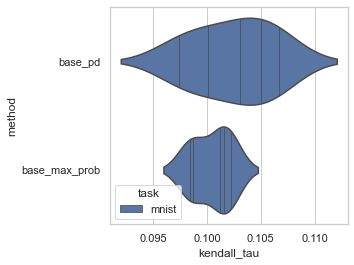

In [35]:
from spred.analytics import plot_evaluation_metric
plot_evaluation_metric(result_db, "kendall_tau")

While **Probability Difference** is comparable to **MaxProb**, generally it seems that **MaxProb** is still a somewhat better choice for MNIST!

### END OF TUTORIAL